In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

> **Import Data**

In [2]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.shape

(6607, 20)

In [5]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


>   Since there are fewer missing values and our goal is to find the hidden relationship between the students and their scores, dropping the null values won't have an effect.

In [6]:
df = df.dropna()

In [7]:
for col in df.select_dtypes('object'):
    df[col] = df[col].astype('category')

> # 1)  Feature Grouping for Analysis

# I- Sociol-Economic Factors

>  Let’s see if **sociol economic factors** affect student marks. I’ve combined the columns for **Family Income**, **Parental Education Level**, **Parental Involvement**, and **Access to Resources**. These are all things that can shape a student's **academic performance**—whether it's having the right resources, support from parents, or even the family's financial background. By looking at these together, we can get a better sense of how they might be influencing **exam scores**.

In [8]:
df['socio_Economic'] = df[['Family_Income' , 'Parental_Education_Level' , 'Parental_Involvement' , 'Access_to_Resources']].sum(axis=1)

In [9]:
def group_socio_economic(row):
    if row['Family_Income'] == 'High' and row['Parental_Education_Level'] in ['Postgraduate']:
        return 'High_Socio'
    elif row['Family_Income'] == 'Medium':
        return 'Medium_Socio'
    else:
        return 'Low_Socio'

df['socio_Economic'] = df.apply(group_socio_economic, axis=1)


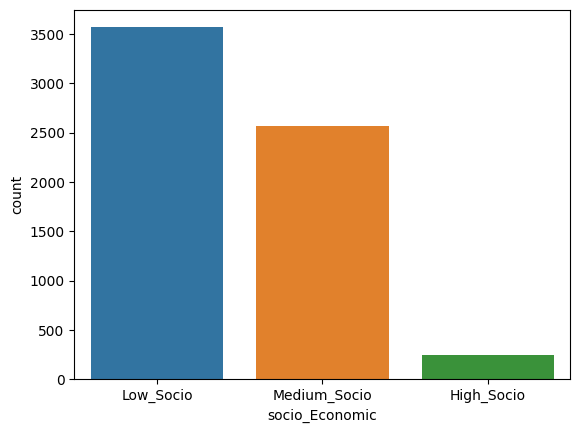

In [10]:
sns.countplot(x='socio_Economic', data=df)
plt.show()


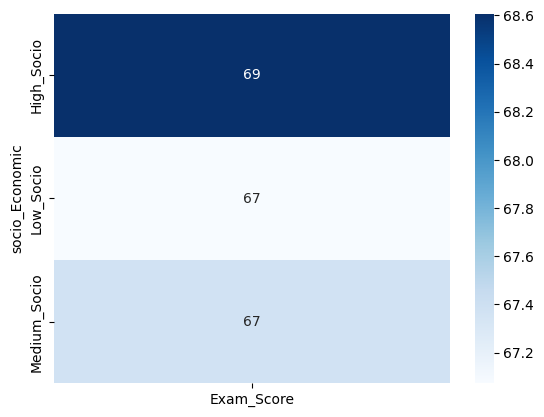

In [11]:
socio_economic_pivot = pd.pivot_table(df, values='Exam_Score', index='socio_Economic', aggfunc='mean')
sns.heatmap(socio_economic_pivot, annot=True, cmap='Blues')
plt.show()


> 
> 1. **Low Socio-Economic Group**: The majority of students come from the low socio-economic group, followed by the medium group, and very few from the high socio-economic group.
>    
> 2. **Exam Scores by Socio-Economic Status**: 
>    - Students from the **High Socio-Economic Group** have slightly better average scores (~69).
>    - Both the **Medium** and **Low Socio-Economic Groups** score similarly, around 67, with minimal difference between them.
   

# II- School-Related Factors

In [12]:
df['School_Type_Encoded'] = df['School_Type'].map({'Public': 0, 'Private': 1})  # Example encoding
df['Teacher_Quality_Encoded'] = df['Teacher_Quality'].map({'Low': 0, 'Medium': 1, 'High': 2})


In [13]:
df['School_factors'] = df[['School_Type_Encoded', 'Teacher_Quality_Encoded', 'Attendance', 'Tutoring_Sessions']].sum(axis=1)

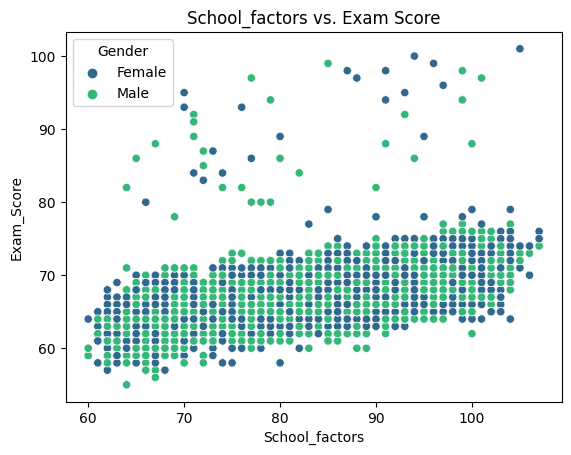

In [14]:
sns.scatterplot(x='School_factors', y='Exam_Score', data=df, hue='Gender', palette='viridis')
plt.title('School_factors vs. Exam Score')
plt.show()


> - **High-performing scores** (above 90) seem to have a slight concentration of **female students**.
> - **Male and female students** cluster around the **60-75 score range**, regardless of the school factors.
> 
> This suggests that while school-related factors influence both genders similarly, there may be slight differences in top performers between male and female students.

> The plot shows that as **school-related factors**—like **school type**, **teacher quality**, **attendance**, and **tutoring sessions**—improve, **exam scores** tend to increase slightly. However, **the relationship isn't very strong**. students can have a wide range of scores regardless of their school factors. While better school-related factors do seem to help students score higher, they don’t guarantee top scores. This suggests that while school factors play a role in performance, there are likely other influences at work as well.

# III-  Student Lifestyle and Behavior

In [15]:
df['Motivation_Level_encoded'] = df['Motivation_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
df['Extracurricular_Activities'] = df['Extracurricular_Activities'].map({'No': 0, 'Yes': 1})

df['Student_lifeStyle'] = df[['Physical_Activity', 'Sleep_Hours', 'Motivation_Level_encoded','Extracurricular_Activities']].sum(axis=1)

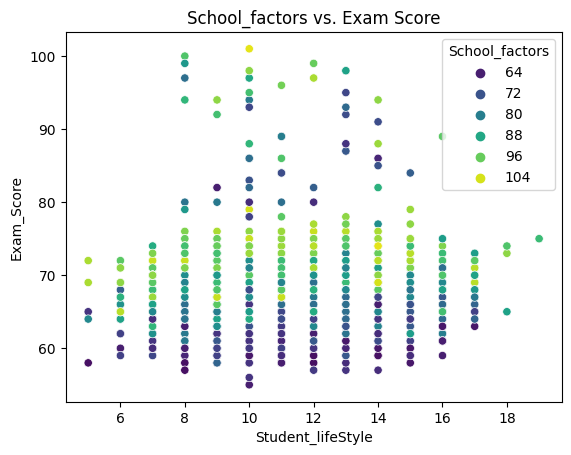

In [16]:
sns.scatterplot(x='Student_lifeStyle', y='Exam_Score', data=df, hue='School_factors', palette='viridis')
plt.title('School_factors vs. Exam Score')
plt.show()

> The scatter plot shows the relationship between **student lifestyle factors**—like physical activity, sleep hours, motivation level, and extracurricular activities—and **exam scores**. 
> 
> Key takeaways:
> 
> 1. **Moderate Lifestyle Scores (10-14)**: Most students with these scores tend to score between **60-80** on their exams. This is where the majority of students are clustered.
>    
> 2. **Higher Lifestyle Scores (14-18)**: Students in this range generally perform better, with many scoring above **90**. While a higher lifestyle score seems to correlate with better exam results, it’s not a guarantee that every student will get top marks.
> 
> 3. **Lower Lifestyle Scores (6-9)**: Students with lower lifestyle scores have a wider range of exam outcomes, from **60 to 100**. Interestingly, some of these students manage to achieve very high marks despite lower lifestyle factors.
> 
> **Conclusion**: While students with **higher lifestyle scores** (typically between **14 and 18**) tend to perform better on exams, there are exceptions. A healthy lifestyle, including regular physical activity, good sleep, high motivation, and participation in extracurricular activities, seems to help, but it's not the only factor. Some students with lower lifestyle scores still manage to achieve **high exam results**

> # 2)  Interactions Between Features

#  I- Gender vs Exam Score

> Let's check the effect of male vs. female students. We often say that females score higher than males, let's see what the data reveals 😉

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


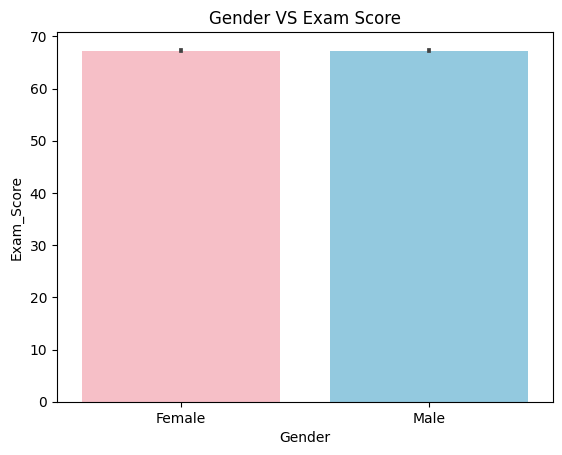

In [17]:
sns.barplot(x='Gender', y='Exam_Score', data=df, palette=['#FFB6C1', '#87CEEB'])
plt.title('Gender VS Exam Score')
plt.show()

**> As the chart shows, both genders are achieving similar exam scores**

# II- Attendance vs Exam Score

> Now let's examine the effect of attendance on exam scores. Many students skip school or college to spend time at home playing video games or simply because they don't feel like going, which often happens to many of us.

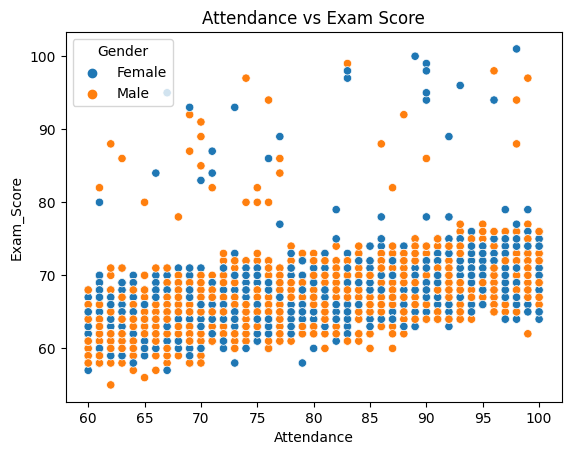

In [18]:
sns.scatterplot(x='Attendance', y='Exam_Score', data=df, hue='Gender')
plt.title('Attendance vs Exam Score')
plt.show()

> The plot shows that while attendance generally correlates with better exam scores, it is not a strict rule. Some students with lower attendance still achieve high marks. However, the majority of students fall into the 60-75 marks range, regardless of their attendance level. The data suggests that although higher attendance may improve the chances of scoring above 75, many students still remain in the lower score bracket even with high attendance. There are no significant differences between male and female students in terms of performance trends.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


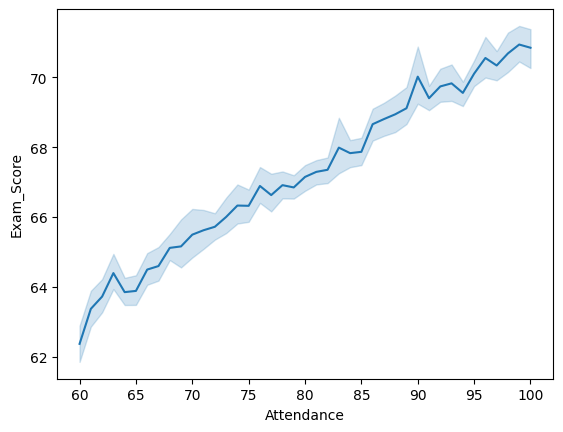

In [19]:
sns.lineplot(x='Attendance', y='Exam_Score', data=df)
plt.show()

> We can see a clear positive trend, as attendance increases, the average exam score also increases. The shaded region represents a confidence interval, showing some variation around the mean, but overall, higher attendance generally leads to better exam scores. This reinforces the idea that consistent attendance is beneficial for improving exam performance, although individual scores may vary slightly.

# III- Hours Studied vs Exam Score

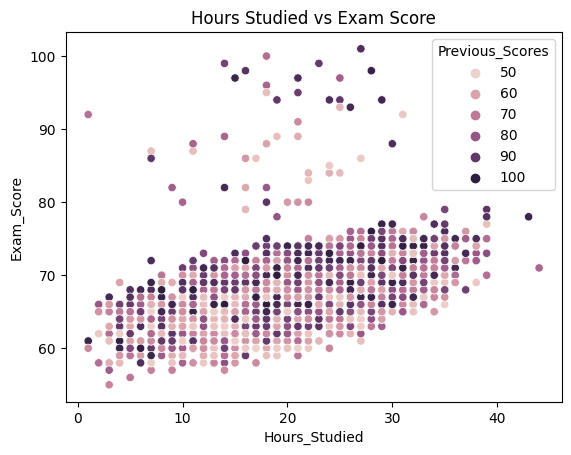

In [20]:
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df, hue='Previous_Scores')
plt.title('Hours Studied vs Exam Score')
plt.show()

> As the plot shows that as **hours studied** increase, **exam scores** tend to rise, but the relationship is not **strict**. There is a wide distribution of scores even for students who study more hours. Students with higher previous scores (darker points) generally perform better, regardless of the hours studied. The plot suggests that **previous performance** has a strong impact on exam scores, while studying more hours contributes but doesn't guarantee top marks.

# IV- Hours Studied x Parental Involvement

> Does parental involvement amplify or diminish the effect of hours studied? Lets find it out

In [21]:
# Convert categorical columns to numeric values
df['Parental_Involvement_numeric'] = df['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Hours_Studied'] = df['Hours_Studied'].astype(float)
df['Parental_Involvement_numeric'] = df['Parental_Involvement_numeric'].astype(int)
df['Hours_Studied_Parental_Involvement'] = df['Hours_Studied'] * df['Parental_Involvement_numeric']


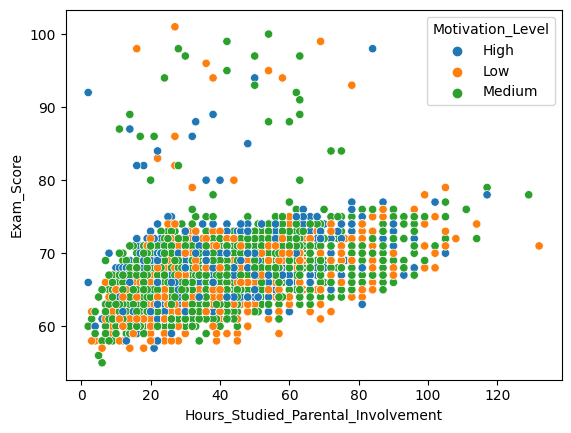

In [22]:
sns.scatterplot(x='Hours_Studied_Parental_Involvement', y='Exam_Score',hue='Motivation_Level', data=df)
plt.show()


> 1. **Positive Correlation**: As the interaction term **'Hours_Studied_Parental_Involvement'** increases, **Exam_Score** tends to rise, showing a positive relationship.
>   
> 2. **Clusters**: A dense cluster of students with lower interaction values (0-40) have exam scores between 60-80, while those with higher interaction values (80-120) show scores between 70-100, but with more variability.
> 
> 3. **Diminishing Returns**: At higher interaction values (above 100), exam scores seem to plateau, indicating limited additional benefits from increasing study hours or parental involvement beyond a certain point.
> 
> ### Summary:
> Both **study hours** and **parental involvement** positively impact exam scores, but after a certain threshold, further increases don't guarantee higher performance, suggesting diminishing returns.

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


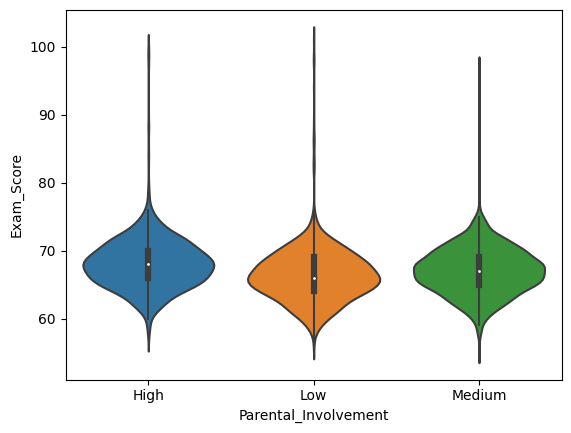

In [23]:
sns.violinplot(x='Parental_Involvement', y='Exam_Score', data=df)
plt.show()

# V-  Motivation_Level × Previous_Scores

> Does higher motivation predict future success even for students with lower past scores?

In [24]:
df['Motivation_Level_numeric'] = df['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
df['Motivation_Level_numeric'] = df['Motivation_Level_numeric'].astype(int)
df['Motivation_Level_Previous_Scores'] = df['Motivation_Level_numeric'] * df['Previous_Scores']

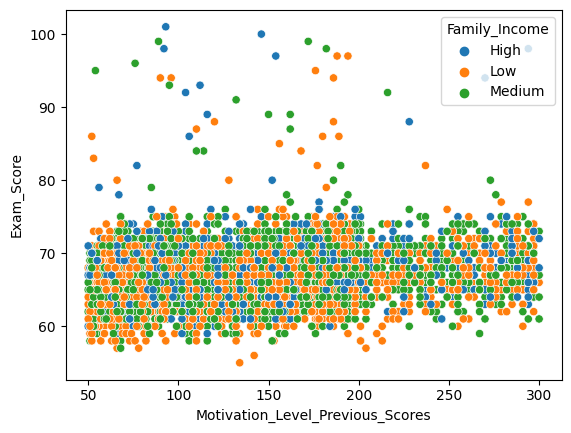

In [25]:
sns.scatterplot(x='Motivation_Level_Previous_Scores', y='Exam_Score',hue='Family_Income', data=df)
plt.show()

> The scatter plot shows the relationship between **Motivation_Level_Previous_Scores** and **Exam_Score** across different **Family_Income** levels. 
> 
> ### Key Insights:
> - **No significant income-based difference**: Students from high, medium, and low income groups have similar **exam score distributions** (mostly between 60–80).
> - **Motivation matters**: Higher **Motivation_Level_Previous_Scores** correlate with slightly better **exam performance**, regardless of income.
> 

# Previous Scores vs Exam Score

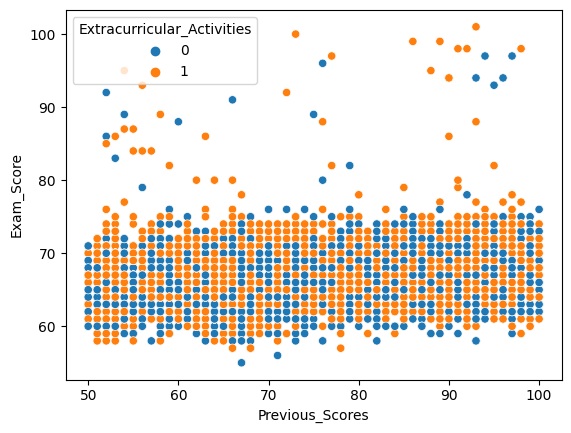

In [26]:
sns.scatterplot(x='Previous_Scores', y='Exam_Score',hue='Extracurricular_Activities', data=df)
plt.show()

> - The scatterplot compares **Previous Scores** (x-axis) with **Exam Score** (y-axis).
> - Points are colored based on **Extracurricular Activities** (blue = no, orange = yes).
> - Most **Exam Scores** are clustered between **60 and 80**, across different previous scores.
> - There is no **strong correlation** between **Previous Scores** and **Exam Score**, though there is a slight upward trend with higher previous scores.
> - Both students with and without extracurricular activities show **similar distributions** in exam scores, suggesting no clear impact of extracurricular involvement in this chart.

> Here comes the end of the EDA on Student Performance. You might be wondering why I didn’t show plots for other features. The reason is that I didn’t find any strong relationships between those features and Exam Score, and I didn’t want to make the notebook redundant. It’s possible I missed something, so if there’s anything you’d like to see or think would be helpful, please let me know in the comments. If you enjoyed the notebook or learned something useful, please upvote it. Have a great day! 😊